In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("newsdata2.csv", index_col="No") #파일 불러오기

In [2]:
data.head()

,View,Recommendation
No,,
1,958,0
2,1208,0
3,878,0
4,1516,0
5,0,0


## Data Normalization

In [4]:
data["View_norm"] = (data["View"] - data["View"].mean()) / data["View"].std()
data["Recommendation_norm"] = (data["Recommendation"] - data["Recommendation"].mean()) / data["Recommendation"].std()

In [5]:
data_norm = data[["View_norm", "Recommendation_norm"]]

In [6]:
data_norm.shape

(1620, 2)

In [7]:
m = len(data_norm)

In [8]:
data_transpose = data_norm.T

In [9]:
data_transpose.head()

No,1,2,3,4,5,6,7,8,9,10,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620
View_norm,-0.720787,-0.518864,-0.785402,-0.270094,-1.494557,0.048137,-0.484940,0.600599,-1.135133,-0.841133,...,-0.266056,-0.056863,0.241176,0.585253,0.123252,2.186101,0.267022,-0.539056,1.976908,0.381714
Recommendation_norm,-0.156829,-0.156829,-0.156829,-0.156829,-0.156829,-0.037157,-0.156829,0.082514,-0.156829,-0.156829,...,-0.156829,-0.156829,-0.156829,-0.037157,-0.156829,0.321857,-0.156829,-0.156829,0.202186,-0.156829


## 데이터 시각화

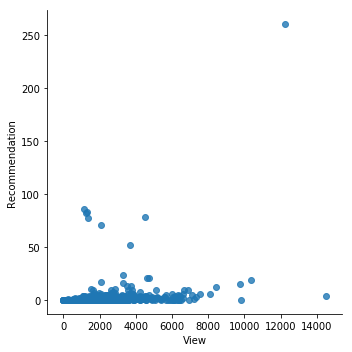

In [10]:
sns.lmplot(data=data, x="View", y="Recommendation", fit_reg = False)

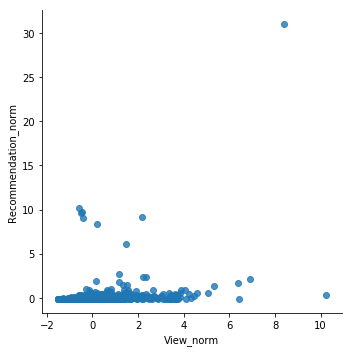

In [11]:
sns.lmplot(data=data, x="View_norm", y="Recommendation_norm", fit_reg = False)

## PCA 를 적용하여 2차원 변수를 1차원으로 변환

In [26]:
Sigma = (1/m) * np.dot(data_transpose, data_norm) #covariance matrix 변환

In [27]:
Sigma

array([[0.99938272, 0.26828193],
       [0.26828193, 0.99938272]])

In [14]:
u, s, vh = np.linalg.svd(Sigma, full_matrices=True) #eigen vector 도출

In [15]:
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [16]:
u_reduce = u[:,1]    # u 매트릭스 자르기

In [17]:
u_reduce

array([-0.70710678,  0.70710678])

In [18]:
u_reduce.T

array([-0.70710678,  0.70710678])

In [28]:
z = np.dot(data_norm, u_reduce)   # z 값 계산

In [20]:
z.shape

(1620,)

In [29]:
data["Z"] = z.T  # z 값을 데이터에 붙이기

In [31]:
data.head()

,View,Recommendation,View_norm,Recommendation_norm,Z
No,,,,,
1,958,0,-0.720787,-0.156829,0.398779
2,1208,0,-0.518864,-0.156829,0.255997
3,878,0,-0.785402,-0.156829,0.444469
4,1516,0,-0.270094,-0.156829,0.080091
5,0,0,-1.494557,-0.156829,0.945917


In [23]:
data.to_csv("dataz.csv")